In [1]:
#Exploration of New product - September 2021
#Section with PCs and with Levels
import datetime as dt 
import glob
import netCDF4 as nc
import numpy as np
import os

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import cmocean
import time
import gsw

import yaml


import numpy as np
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 


In [2]:
with open(r'configuration.yaml') as file:
    configuration = yaml.load(file, Loader=yaml.FullLoader)

    print("File version: ", configuration["version"])

File version:  0.1


In [ ]:
#SST & OsNet

ds_global = xr.open_mfdataset(f"/home/datawork-lops-bluecloud/osnet/grilled_Nordic_Sea/produit_*.nc")
ds_global.load()


In [25]:
weights = np.cos(np.deg2rad(ds.lat))
weights.name = "weights"

In [26]:
temp_weighted = ds.weighted(weights)
temp_weighted

DatasetWeighted with weights along dimensions: lat

In [27]:
weighted_mean = temp_weighted.mean(("lon", "lat"))
weighted_mean


<xarray.Dataset>
Dimensions:             (time: 365, DEPTH: 51)
Coordinates:
  * time                (time) datetime64[ns] 1993-01-01 ... 1993-12-31
  * DEPTH               (DEPTH) int64 0 1 2 3 4 5 6 ... 628 697 773 857 950 1000
Data variables: (12/17)
    SLA                 (time) float64 -0.04704 -0.05069 ... -0.04374 -0.04273
    UGOS                (time) float64 -0.007176 -0.007319 ... -0.00369
    VGOS                (time) float64 -0.01017 -0.01008 ... -0.009424 -0.009092
    UGOSA               (time) float64 -0.005965 -0.006105 ... -0.00101
    VGOSA               (time) float64 -0.003469 -0.00338 ... -0.006347
    SLA_err             (time) float64 0.01705 0.01701 ... 0.02562 0.02562
    ...                  ...
    PSAL_predicted      (DEPTH, time) float64 34.83 34.83 34.83 ... 34.91 34.91
    TEMP_predicted      (DEPTH, time) float64 1.196 1.187 ... -0.5837 -0.5833
    PSAL_predicted_std  (DEPTH, time) float64 0.02496 0.02522 ... 0.005218
    TEMP_predicted_std  (DEPTH, time) float64 0.1427 0.1454 ... 0.09319 0.09254
    MLD_mask            (DEPTH, time) float64 1.489e-05 1.469e-05 ... 0.9988
    SIG_predicted       (DEPTH, time) float64 27.86 27.86 27.86 ... 28.06 28.06

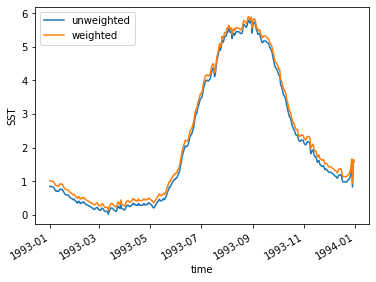

In [28]:
ds.mean(("lon", "lat"))['SST'].plot(label="unweighted")
weighted_mean['SST'].plot(label="weighted")

plt.legend()

## Time Series few years

In [3]:
years1 = 1995
years2 = 2000

In [4]:
ds = xr.open_mfdataset(f"/home/datawork-lops-bluecloud/osnet/grilled_Nordic_Sea/produit_{1995}*.nc")
ds.load()
ds = ds.sel(DEPTH=ds['DEPTH'][0])

In [32]:
ds

<xarray.Dataset>
Dimensions:             (time: 365, lat: 32, lon: 100)
Coordinates:
    mask                (time, lat, lon) float64 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
    DEPTH               int64 0
  * time                (time) datetime64[ns] 1995-01-01 ... 1995-12-31
  * lat                 (lat) float64 69.12 69.38 69.62 ... 76.38 76.62 76.88
  * lon                 (lon) float64 -19.88 -19.62 -19.38 ... 4.375 4.625 4.875
Data variables: (12/17)
    SLA                 (time, lat, lon) float32 -0.039 -0.0372 ... 0.0494
    UGOS                (time, lat, lon) float32 -0.0273 -0.0279 ... -0.0004
    VGOS                (time, lat, lon) float32 -0.0651 -0.0488 ... 0.0357
    UGOSA               (time, lat, lon) float32 -0.0085 -0.0123 ... 0.0069
    VGOSA               (time, lat, lon) float32 0.0046 0.0143 ... 0.0074 0.0133
    SLA_err             (time, lat, lon) float32 0.0148 0.0151 ... 0.0166 0.0169
    ...                  ...
    PSAL_predicted      (time, lat, lon) float32 34.82 34.84 ... 34.98 34.98
    TEMP_predicted      (time, lat, lon) float32 0.4676 0.5026 ... 1.55 1.608
    PSAL_predicted_std  (time, lat, lon) float32 0.03224 0.02812 ... 0.02055
    TEMP_predicted_std  (time, lat, lon) float32 0.1318 0.1297 ... 0.1412 0.1584
    MLD_mask            (time, lat, lon) float32 2.856e-07 ... 8.089e-05
    SIG_predicted       (time, lat, lon) float64 27.94 27.95 ... 27.99 27.99

### Glorys12

In [20]:
%%time

ds_weighted = []

for yy in range(years1, years2 + 1):

    #Glorys12 - thetao
    ds = xr.open_mfdataset(f"/home/datawork-lops-bluecloud/osnet/data_out/bootstrap/OsNet_test_Nordic_Sea/glorys_test/{yy}/GLORYS_{yy}*.nc")
    ds.load()
    ds = ds.sel(depth=ds['depth'][0])
    
    weights = np.cos(np.deg2rad(ds.latitude))
    weights.name = "weights"
    
    temp_weighted = ds.weighted(weights)

    weighted_mean = temp_weighted.mean(("longitude", "latitude"))
    
    #print(len(weighted_mean['thetao'].compute()))
    
    if(yy == years1): #première année
        for day in range(364):
            list_to_append = []
            list_to_append.append(weighted_mean['thetao'].compute()[day].item())
            ds_weighted.append(list_to_append)
            
            
    elif(yy >= (years1 + 1) ): 
        for day in range(364):
            ds_weighted[day].append(weighted_mean['thetao'].compute()[day].item())

    print(f"{yy} Done !")

1995 Done !
1996 Done !
1997 Done !
1998 Done !
1999 Done !
2000 Done !
2001 Done !
2002 Done !
2003 Done !
2004 Done !
2005 Done !
2006 Done !
2007 Done !
2008 Done !
2009 Done !
2010 Done !
CPU times: user 11min 36s, sys: 1min 51s, total: 13min 28s
Wall time: 16min 29s


### OsNet & SST

In [26]:
%%time

#change SST or TEMP_predicted

ds_weighted = []

for yy in range(years1, years2 + 1):
    
    ds = xr.open_mfdataset(f"/home/datawork-lops-bluecloud/osnet/grilled_Nordic_Sea/produit_{yy}*.nc")
    ds.load()
    ds = ds.sel(DEPTH=ds['DEPTH'][0])
    
    weights = np.cos(np.deg2rad(ds.lat))
    weights.name = "weights"
    
    temp_weighted = ds.weighted(weights)

    weighted_mean = temp_weighted.mean(("lon", "lat"))
    
    if(yy == years1): #première année
        for day in range(364):
            list_to_append = []
            list_to_append.append(weighted_mean['SST'].compute()[day].item())
            ds_weighted.append(list_to_append)
            
            
    elif(yy >= (years1 + 1)): 
        for day in range(364):
            ds_weighted[day].append(weighted_mean['SST'].compute()[day].item())

    print(f"{yy} Done !")

1995 Done !
1996 Done !
1997 Done !
1998 Done !
1999 Done !
2000 Done !
2001 Done !
2002 Done !
2003 Done !
2004 Done !
2005 Done !
2006 Done !
2007 Done !
2008 Done !
2009 Done !
2010 Done !
CPU times: user 18.2 s, sys: 19.2 s, total: 37.4 s
Wall time: 2min 34s


In [27]:

ds_weighted_final = []

for size in range(len(ds_weighted)):
    
    data_current = []
    data_current = [x for x in ds_weighted[size] if math.isnan(x) == False]
    
    average = 0
    summ = 0
    
    summ = sum(data_current)        
    average = summ / len(data_current)
    
    ds_weighted_final.append(average)
    

In [28]:
ds_weighted_final_SST = ds_weighted_final.copy()

In [25]:
ds_weighted_final_OsNet = ds_weighted_final.copy()

In [22]:
ds_weighted_final_Glorys12 = ds_weighted_final.copy()

### Plot of results

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


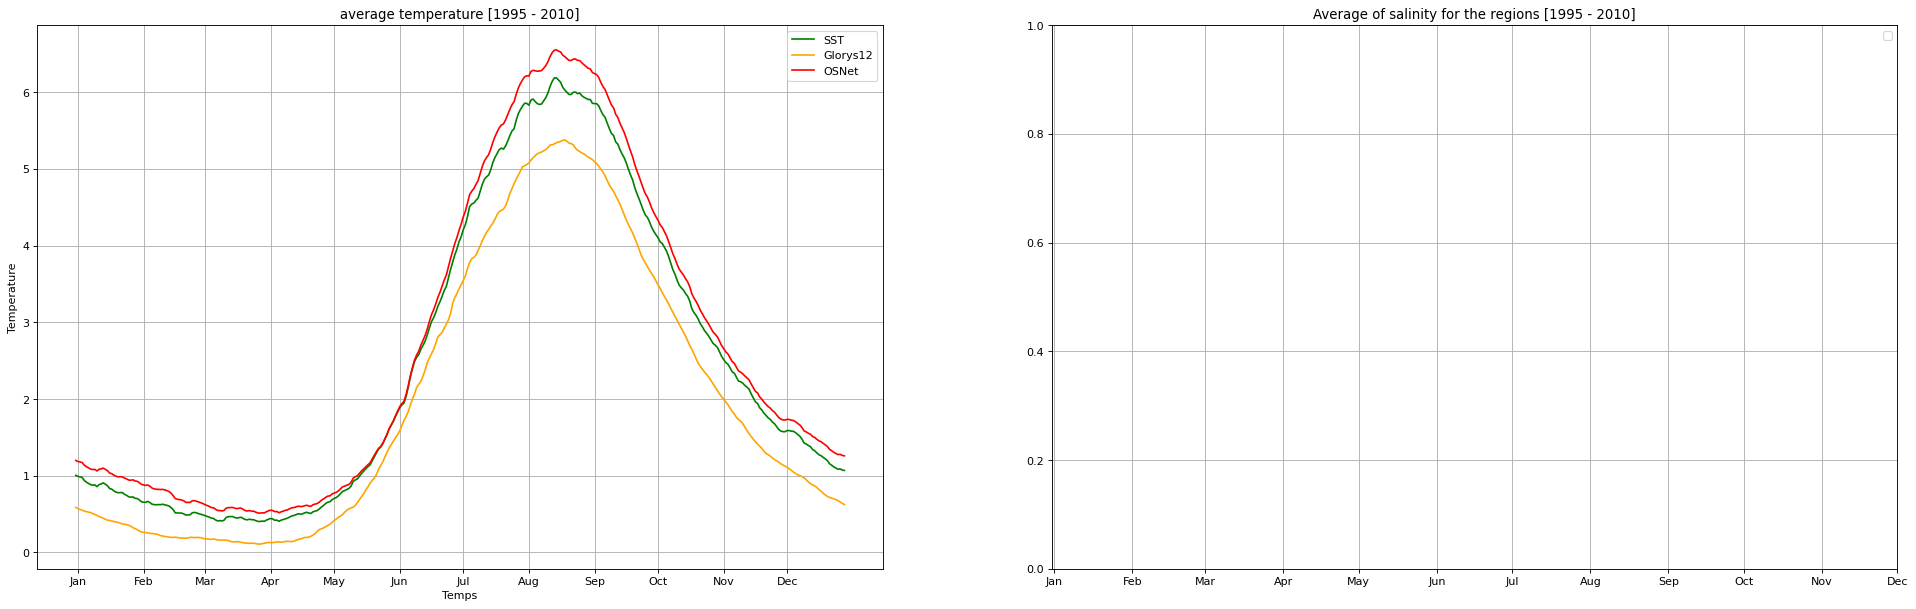

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30,9), dpi=80, facecolor='w', edgecolor='k')

ax[0].set_title("average temperature [1995 - 2010]")
ax[0].plot(np.arange(364), ds_weighted_final_SST, label='SST',c = 'green')
ax[0].plot(np.arange(364), ds_weighted_final_Glorys12, label='Glorys12',c = 'orange')
ax[0].plot(np.arange(364), ds_weighted_final_OsNet, label='OSNet',c = 'red')
#ax[0].plot(np.arange(364), tempo_list_final, label='Armor3D',c = 'pink')


ax[1].set_title("Average of salinity for the regions [1995 - 2010]")


plt.setp(ax[0], xlabel='Temps')
plt.setp(ax[0], ylabel='Temperature')

month_starts = [1,32,61,92,122,153,183,214,245,275,306,336]
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec'] 

ax[0].set_xticks(month_starts)
ax[0].set_xticklabels(month_names)

ax[1].set_xticks(month_starts)
ax[1].set_xticklabels(month_names)

leg = ax[0].legend();
leg = ax[1].legend();

ax[0].grid() 
ax[1].grid()
plt.show()